## Focus with a VCM Mechanism
## Duke  University Spring 2019
### David Brady
Wednesday 30 January 2019

A version of the code provided in these notebooks is available at 
https://github.com/Aqueti/microcameraDevelopmentKit

In particular, image streaming as shown in class uses the ~/bin/broadcast.py script with 
https://github.com/Aqueti/microcameraDevelopmentKit/blob/master/render/receive.cmd 

This notebook explores remote access and focus/exposure control for a camera set up in the Chesterfield building for use in class. You should log into the chat room if you are actively using camera resources, announce what you are doing. The camera used in this notebook is nvidia@10.236.176.153

The camera module used for this system is described at https://www.centuryarks.com/en/products/cm 
The sensor has a 12 megapixels, capture mode 10, 4208 by 3120 pixels may be appropriate to analyze the image. 

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import skimage
import skimage.io as imio
import skimage.transform as trans
from skimage.viewer import ImageViewer
import glob
import re
from time import gmtime, strftime, sleep
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 

This notebook uses linux on windows bash commands to control and capture data from the camera. Use the username 'nvidia' to login to the camera, with password 'nvidia' Obviously, security is pretty lax, don't mess the camera up too much or you will mess up the class for a day or two while we reflash it's operating system. 

To send commands using rsh to the camera without a password you need to set up an ssh key on your computer and copy the key to the camera. Instructions for this are on the sakai site resources under the software and interfaces folder. You can test your ability to do this with the cell below. 

In [2]:
cmd="'rsh nvidia@10.236.176.153 ls'"
subprocess.run('bash -c '+cmd)

CompletedProcess(args="bash -c 'rsh nvidia@10.236.176.153 ls'", returncode=0)

we can make the process of grabbing a frame from the camera into a function. In this command the sensor id, sid, can be either 1 or 0. To look at the effect of imres, review  nvgstcapture --help 

In [37]:
def grabImage(sid=1, imres=8):
    # I will use the file name dbGrab.... for the image grabbed from the camera. First step is to get rid of previously grabbed images
    subprocess.run('bash -c "rm dbGrab*"', \
                   stdout=subprocess.PIPE, shell=True)
    cmd1="""'rsh nvidia@10.236.176.153 "rm dbGrab*"'"""
    subprocess.run('bash -c '+cmd1, \
                   stdout=subprocess.PIPE, shell=True)
    # ok, now let's grab an image on the tegra
    cmD='rsh nvidia@10.236.176.153 "nvgstcapture-1.0 -m 1 --sensor-id '+str(sid)+' -A --capture-auto 1 \
--file-name dbGrab --image-res '+ str(imres)+'"'
    subprocess.run('bash -c '+"'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    subprocess.run('bash -c "rcp nvidia@10.236.176.153:dbGrab* ."', \
                   stdout=subprocess.PIPE, shell=True)
    #ok, now let's find the file name of the image we just grabbed and transfered 
    pop=subprocess.run('bash -c ls',stdout=subprocess.PIPE, shell=True)
    rePop=pop.stdout
    rePop=rePop.decode("utf-8")
    fileName = re.search(r'dbGrab(.*).jpg', rePop)
    fileName=fileName.group()
    pop=imio.imread(fileName)
    #pop=skimage.transform.rotate(pop,180)
    return pop

In [38]:
pip=grabImage(sid=1, imres=10)

In [39]:
pip.shape

(3120, 4208, 3)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


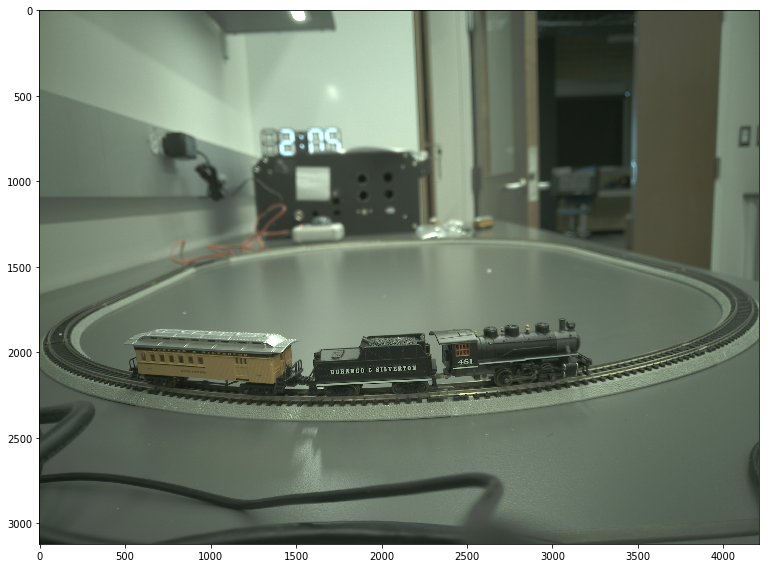

In [40]:
imio.imshow(pip)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


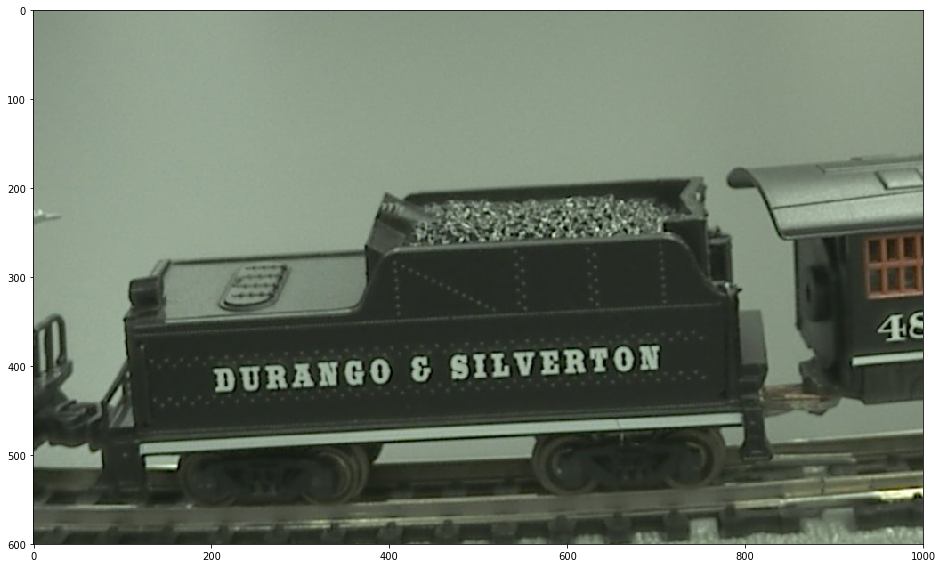

In [41]:
imio.imshow(pip[1700:2300,1500:2500,:])

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


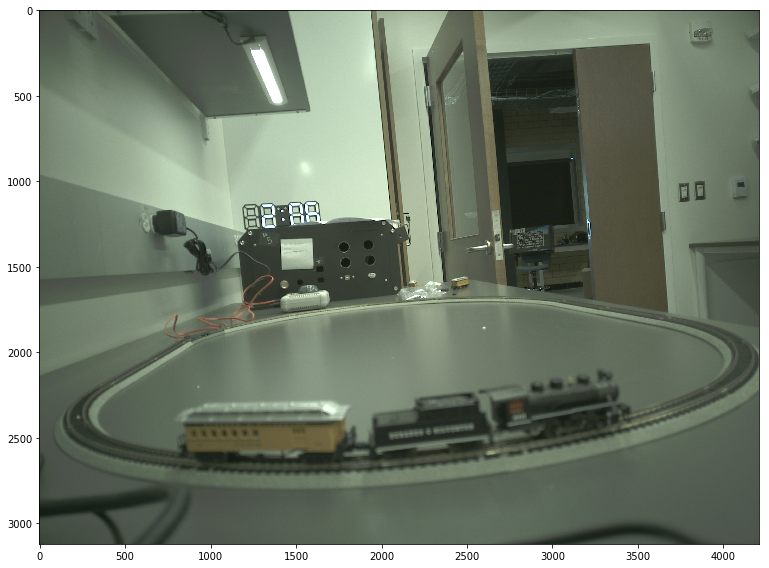

In [42]:
pip=grabImage(sid=0, imres=10)
imio.imshow(pip)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


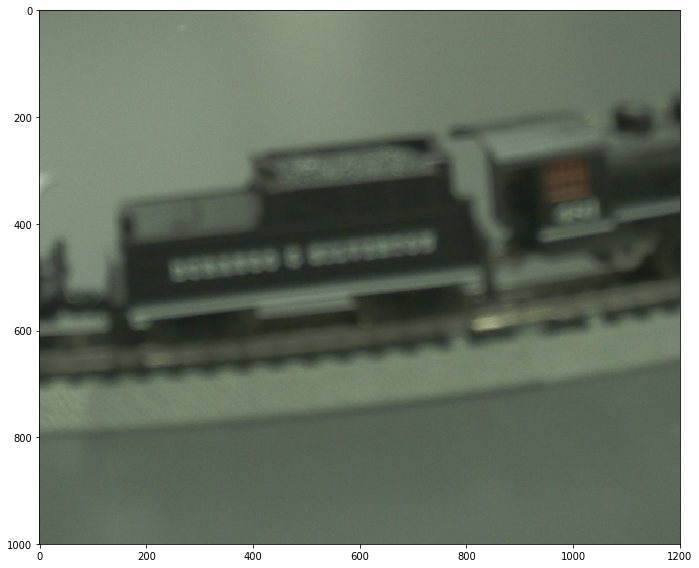

In [43]:
imio.imshow(pip[2000:3000,1800:3000,:])

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


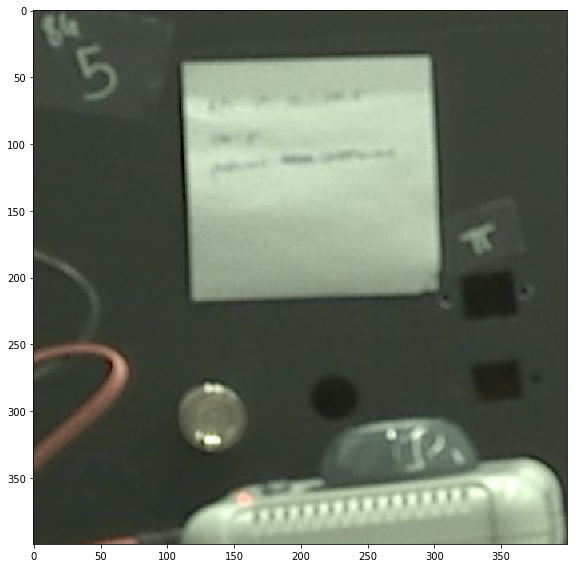

In [45]:
imio.imshow(pip[1300:1700,1300:1700,:])

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


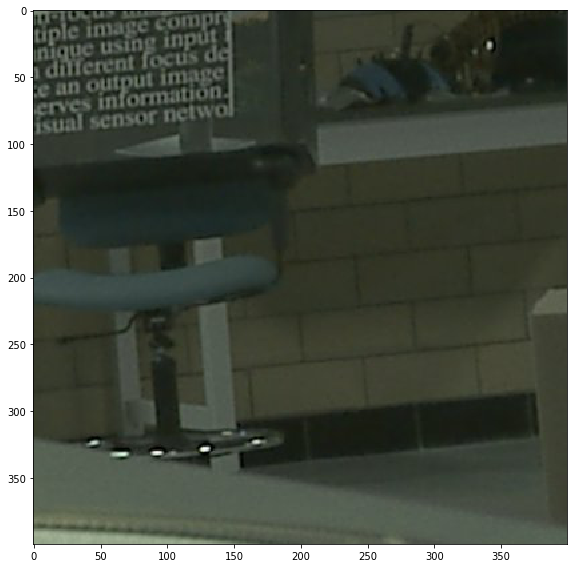

In [46]:
imio.imshow(pip[1300:1700,2800:3200,:])

In [47]:
pip=grabImage(sid=0, imres=10)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


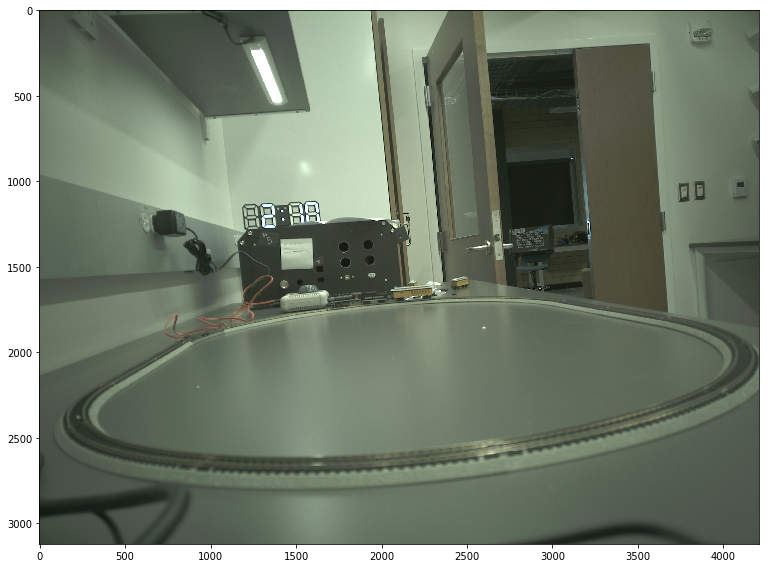

In [48]:
imio.imshow(pip)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


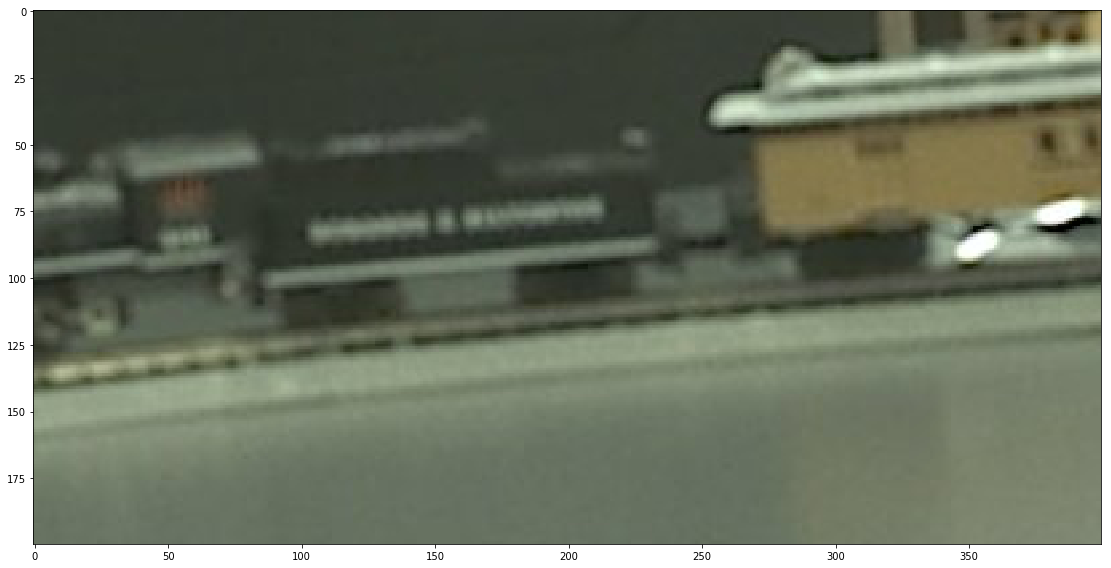

In [49]:
imio.imshow(pip[1600:1800,1800:2200,:])

In [50]:
pip=grabImage(sid=1, imres=10)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


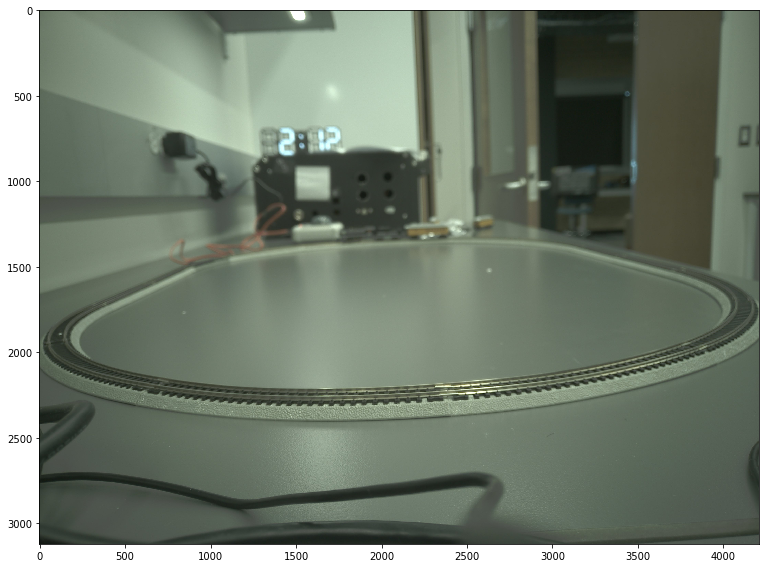

In [51]:
imio.imshow(pip)

C:\Users\dbrad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dbrad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


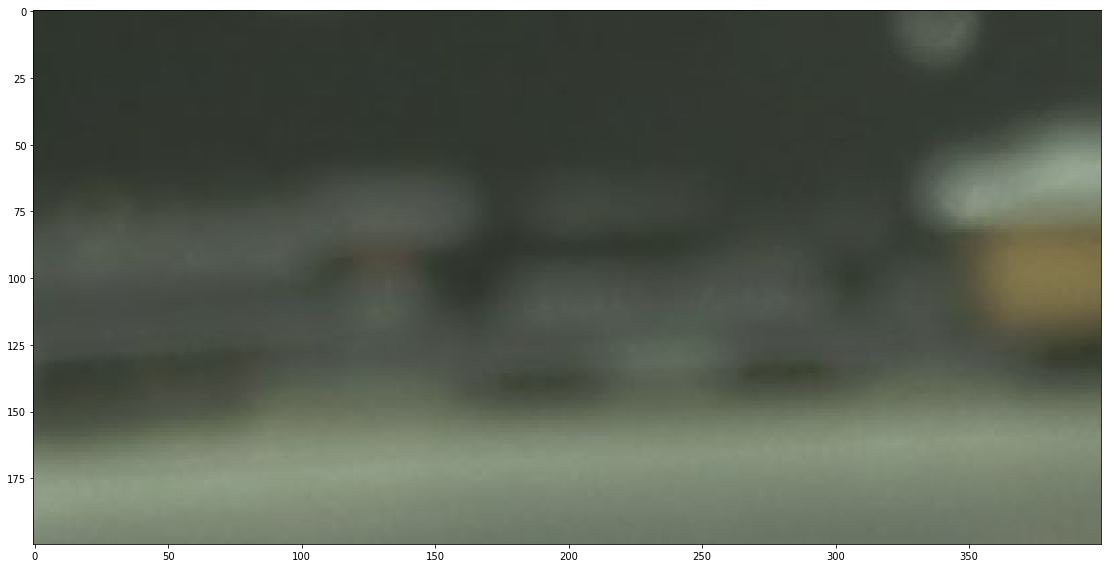

In [53]:
imio.imshow(pip[1200:1400,1800:2200,:])

The program ~/cam_on_Tegra-master/testCamera moves the focus of the camera. Instructions for use are below

Camera Focus Control Program:
Caution: use with 'sudo'.
Command:
-help: show help info.
-id x: Set the camera x that you want to operate.  Valid id: 0(default) or 1. 
Combine with other command when using. e.g. sudo ./testCamera -id 1 -init
-init: to initialize the camera setting.
PS: Only need to initialize when it is the first time to run the camera after reboot.
-set xxx: set focal length to xxx(0-1023). e.g. sudo ./testCamera -id 0 -set 512.
-mod xxx: change focal length by xxx. e.g. sudo ./testCamera -id 0 -mod -50.
-return: return current focal length of cam. e.g. sudo ./testCamera -id 0 -return.




In [64]:
def setFocus(sid=1, pos=512):
    cmD='rsh nvidia@10.236.176.153 "sudo ~/cam_on_Tegra-master/testCamera -id '+str(sid)+' -set '+str(pos)+'"'
    pop=subprocess.run('bash -c '+ "'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    return pop.stdout
def initialFocus(sid=1):
    cmD='rsh nvidia@10.236.176.153 "sudo ~/cam_on_Tegra-master/testCamera -id '+str(sid)+' --init "'
    pop=subprocess.run('bash -c '+"'"+cmD+"'", stdout=subprocess.PIPE, shell=True)
    return pop.stdout

In [67]:
a=setFocus(sid=1,pos=540)